##Sampling Distribution ##

만약, 단순무작위추출을 실험으로 생각한다면, 표본평균은 실험의 결과로 나온 수치 즉, 확률변수이다.

(확률변수 정의: 실험의 결과를 수치적으로 정의한 것)

x바가 확률변수라는게 성립하면? - 다른 확률변수들처럼 표본평균도 평균(기댓값) 표준편차, 확률분포를 가진다!!

the expected value of x바
average of average.
mean of all possible mean

는  popualtion mean과 같다.

E(X) = 모집단 평균
E(x) = 표본 평균
E(x바) = 모집단 평균

#### Standard deviation of x바

샘플 하나 안에서는 n이 많아질수록 분산도가 커진다. (5명의 아이큐 분산과 500명 아이큐 분산 중 500명일 때가 더 분산이 크다.)


하지만, 이것은 샘플 끼리의 분산이다. 각 샘플끼리의 분산은 n이 커질수록 작아진다.

샘플1 - 50명
샘플2 - 500명이라고 할 때

샘플1의 표준편차와 샘플 2의 표준편차는 500일 때의 분산이 더 클 것이다. 더 많은 사람드을 볼수록 사람들은 다양해진다.  하지만 이것은 샘플1안의 표준편차, 샘플2의 표준편차이다. 즉, within each sample의 variability이다.

각각의 샘플에서는 n이 커질수록 표준편차는 커진다.

근데 헷갈리면 안된다. 표준오차는 '''''' between each sample. 각각 샘플 끼리의 표준편차는 더 작아질 것이다. n이 커질수록!!

50명의 샘플끼리의 표준편차와
그리고 500명으로 이뤄진 샘플들끼리의 표준편차는 500명으로 이뤄진 샘플들끼리의 표준편차가 더 작을 것이다.

즉, 50 50 50 50 50 50 끼리의 표준편차와
500 500 500 500 500 끼리의 표준편차는 500끼리의 표준편차가 더 작다는 의미이다.
(*표준오차는 between each sample의 표준편차이다,

그러므로 사례수가 커질수록variability는 작아질 것이다.*)

##Relationship between sample size and the sampling distribution of 𝒙̅.

**Interval Estimation**

confidence interval: estimate the range of a 모수 from a point estimate

Because a point estimator cannot be expected to provide the
exact value of the population parameter, an interval estimate is often computed by
adding and subtracting a value, called the margin of error to the point estimate

왜 신뢰구간은 모수와 점추정치가 얼마나 가깝냐에 대한 정보를 준다고 말하는 걸까?

    답: 표본마다 𝑥̄는 달라요.
    그래서 우리는 “이 표본평균이 모집단 평균에 얼마나 가까울까?”를 알고 싶어요. 신뢰구간은 그 “불확실성”을 수치로 표현하는 방법이에요.

    즉,
    “이 표본에서 얻은 평균이 진짜 모집단 평균과 얼마나 가까운가?”
    를 구간으로 보여주는 겁니다. 즉, 신뢰구간은

    표본으로 계산된 점추정치(𝑥̄)가 모집단의 진짜 값(μ)에 얼마나 가까운지를 보여주는 ‘범위’ 입니다.

결론: 신뢰구간은 점추정치가 모집단 평균에 얼마나 가까운지를 범위로 표현하는 것이다.(아~ 내 점 추정치가 모수와 다를 것이라는거 나도 알아, 그러니까 내가 구간을 줄게. 이 구간의 하한과 상한 정도 거리 안에서 내 점 추정치와 모수는 가까워! 그리고 나는 이걸 신뢰수준만큼 확신해!!)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# confidence interval based on z-distribution

In [2]:
# load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
# loading CSV file stored in google drive
# your own file path should be defined--i.e., where your file is stored in google drive
file_path='/content/drive/MyDrive/data analysis and coding/lotte.csv'
# save data as data
data=pd.read_csv(file_path)

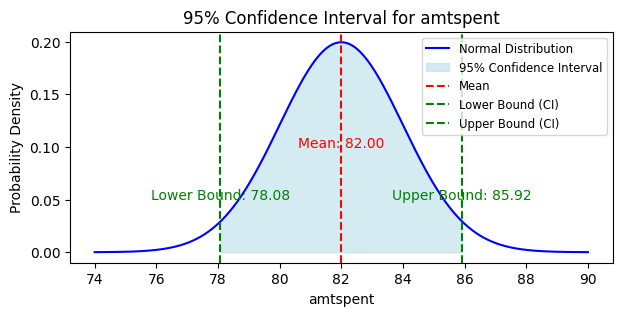

In [4]:
# Extract the data
amtspent = data['amtspent']
# Known population standard deviation
population_sd = 20
# Sample mean
sample_mean = np.mean(amtspent)
# Sample size
n = len(amtspent)
# Z-score for 95% confidence interval
z_score = norm.ppf(0.975)
# Margin of error
margin_of_error = z_score * (population_sd / np.sqrt(n))
# Confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
# Parameters for the plot
mean = sample_mean
std_dev = population_sd / np.sqrt(n)
confidence_level = 0.95
# Generate a range of values for x-axis
x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 1000)
y = norm.pdf(x, mean, std_dev)
# Confidence interval values
lower_ci, upper_ci = confidence_interval
# Plot the normal distribution curve
plt.figure(figsize=(7, 3))
plt.plot(x, y, label='Normal Distribution', color='blue')
# Fill the confidence interval
plt.fill_between(x, y, where=(x >= lower_ci) & (x <= upper_ci), color='lightblue', alpha=0.5, label='95% Confidence Interval')
# Mark the mean and confidence interval bounds
plt.axvline(mean, color='red', linestyle='--', label='Mean')
plt.axvline(lower_ci, color='green', linestyle='--', label='Lower Bound (CI)')
plt.axvline(upper_ci, color='green', linestyle='--', label='Upper Bound (CI)')
# Annotate the mean and confidence interval bounds
plt.text(mean, max(y)/2, f'Mean: {mean:.2f}', color='red', ha='center')
plt.text(lower_ci, max(y)/4, f'Lower Bound: {lower_ci:.2f}', color='green', ha='center')
plt.text(upper_ci, max(y)/4, f'Upper Bound: {upper_ci:.2f}', color='green', ha='center')
# Labels and legend
plt.title('95% Confidence Interval for amtspent')
plt.xlabel('amtspent')
plt.ylabel('Probability Density')
plt.legend(loc='upper right', fontsize='small')
plt.show()

# confidence interval based on t-distribution

In [5]:
# load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

In [6]:
# loading CSV file stored in google drive
# your own file path should be defined--i.e., where your file is stored in google drive
file_path = '/content/drive/MyDrive/data analysis and coding/cbalance.csv'
# save data as df
df = pd.read_csv(file_path)

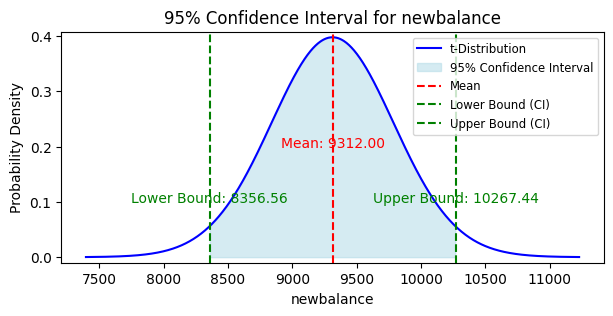

In [7]:
# Extract the newbalance column
newbalance = df['newbalance']
# Sample mean
sample_mean = np.mean(newbalance)
# Sample standard deviation
sample_std = np.std(newbalance, ddof=1)
# Sample size
n = len(newbalance)
# Degrees of freedom
degrees_of_freedom = n - 1
# T-score for 95% confidence interval
t_score = t.ppf(0.975, degrees_of_freedom)
# Margin of error
margin_of_error = t_score * (sample_std / np.sqrt(n))
# Confidence interval
lower_ci, upper_ci = sample_mean - margin_of_error, sample_mean + margin_of_error
# Generate a range of values for x-axis (mean ± 4 * standard error)
standard_error = sample_std / np.sqrt(n)
x = np.linspace(sample_mean - 4 * standard_error, sample_mean + 4 * standard_error, 1000)
y = t.pdf((x - sample_mean) / standard_error, degrees_of_freedom)
# Plot the t-distribution curve
plt.figure(figsize=(7, 3))
plt.plot(x, y, label='t-Distribution', color='blue')
# Fill the confidence interval
plt.fill_between(x, y, where=(x >= lower_ci) & (x <= upper_ci), color='lightblue', alpha=0.5, label='95% Confidence Interval')
# Mark the mean and confidence interval bounds
plt.axvline(sample_mean, color='red', linestyle='--', label='Mean')
plt.axvline(lower_ci, color='green', linestyle='--', label='Lower Bound (CI)')
plt.axvline(upper_ci, color='green', linestyle='--', label='Upper Bound (CI)')
# Annotate the mean and confidence interval bounds
plt.text(sample_mean, max(y)/2, f'Mean: {sample_mean:.2f}', color='red', ha='center')
plt.text(lower_ci, max(y)/4, f'Lower Bound: {lower_ci:.2f}', color='green', ha='center')
plt.text(upper_ci, max(y)/4, f'Upper Bound: {upper_ci:.2f}', color='green', ha='center')
# Adjust y limits to provide space for the text annotations
plt.ylim(-0.01, max(y) + 0.01)
# Labels and legend
plt.title('95% Confidence Interval for newbalance')
plt.xlabel('newbalance')
plt.ylabel('Probability Density')
plt.legend(loc='upper right', fontsize='small')
plt.show()

- 모집단 평균을 모르지만
뮤를 특정 값을 주고
테스트를 진행해야함.

- 우리는 영향의 크기를
모른다. 하지만, 영향이 없다
는 알 수 있다(특정 값으로)


##Hypothesis Testing

우리는 관계가 있다는 것을 알고 싶음에도 불구하고 영가설을 쓴다(영향 또는 관계가 없다!라고 하는)
왜냐면 특정 값을 모르기 때문에, 유튜브의 성적 영향이면 a - b가 영향이냐? a - f가 영향이냐? 이걸 모른다.

우리는 disprove 영가설을 통해 prove alternative h를 하고 싶은 것이다. 우리는 대안가설을 직접 증명할 수 없으니!

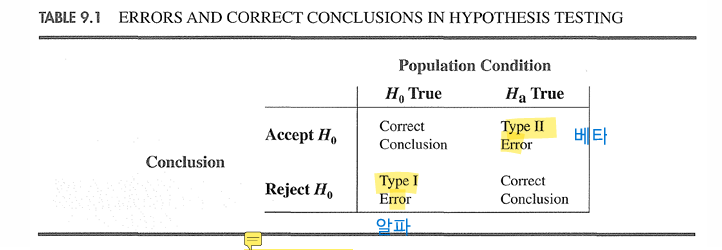

뮤0가 우리의 표본 값과
충분히 가깝다면(그래프 상에서)
뮤0는 참일 수 있다는 것.
(즉, 우리가 관심 있는 것은 정규분포에서
뮤0와 우리의 표본값이 how far?)

# z test

Population Mean: 𝝈 is known

In [8]:
# Load packages
import pandas as pd
import numpy as np
from scipy import stats
# Load the dataset
file_path = '/content/drive/MyDrive/data analysis and coding/maxflight.csv'
maxflight = pd.read_csv(file_path)
# Extract the relevant column
yards = maxflight['yards']
# Known population parameters
population_mean = 295
population_std = 12
# Sample statistics
sample_mean = np.mean(yards)
n = len(yards)
# Calculate the z-score
z_score = (sample_mean - population_mean) / (population_std / np.sqrt(n))
# Calculate the p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
# Calculate the 95% confidence interval
ci_lower = sample_mean - 1.96 * (population_std / np.sqrt(n))
ci_upper = sample_mean + 1.96 * (population_std / np.sqrt(n))

In [9]:
# Print the results
print(z_score)
print(p_value, '\n')
print(ci_lower, ci_upper)

1.5320646925708663
0.12550647143746585 

294.2737697012985 300.92623029870157


In [10]:
# Decision based on significance level of 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The population mean is significantly different from 295.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference from the population mean of 295.")

Fail to reject the null hypothesis: There is no significant difference from the population mean of 295.


# t test

Population Mean: 𝝈 is unknown

In [11]:
# Load packages
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import statsmodels.stats.api as sms
# Load the dataset
file_path = '/content/drive/MyDrive/data analysis and coding/apple.csv'
apple = pd.read_csv(file_path)
# Extract the relevant column
units = apple['units']
# Known population parameter
population_mean = 40
# Perform one-sample t-test
t_stat, p_value= stats.ttest_1samp(units, population_mean)
# Compute 95% confidence interval
confidence_interval = sms.DescrStatsW(units).tconfint_mean()

In [12]:
# Print the results
print(t_stat)
print(p_value, '\n')
print(confidence_interval)

-1.1026456085839627
0.28111571786410516 

(np.float64(32.53339896476426), np.float64(42.26660103523574))


In [13]:
# Decision based on significance level of 0.05
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The population mean is significantly different from 40.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference from the population mean of 40.")

Fail to reject the null hypothesis: There is no significant difference from the population mean of 40.
